# **Welcome to CIS545 Project, Spring 2022**
## **Group 95**

**Group Members:**
 
1.   Karne Chaithanya Sai 
2.   Aman Kumar 
**Pointers:**
*   We are using our own dataset for this project. This dataset contains the data about the products sold by DataCo Global to consumers and corporates majorly and their supply chain statistics.

*   Product details (name description, price etc), shipping details (estimated/real shipping time), late delivery risk, delivery status etc., and the customer details are included in the dataset.

*   It contains the statistical data of Clothing, Sports, and Electronic Supplies related products. The data has 53 columns and 180520 rows.

*  Each row of the dataset refers to one purchase made by the customer along with that purchase's supply chain statistics.

*  The dataset can be found [here](https://data.mendeley.com/datasets/8gx2fvg2k6/5). **The dataset needs to be uploaded on colab session storage for all of the code cells to run.**

*  The description file for this dataset can be found [here](https://drive.google.com/file/d/1YAlnk9-dFhkB-OOd-MyEKRrZZP8Xywcz/view?usp=sharing)





First it is important to load all the required libraries for our project implementation

In [ ]:
!pip install pandasql

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import chardet
import pandasql as ps

We need to find the type of encoding used for our dataset. The following code gives the encoding of the dataset.

In [ ]:
with open("DataCoSupplyChainDataset.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'confidence': 0.73, 'encoding': 'ISO-8859-1', 'language': ''}

Let us now read our dataset into a dataframe called "df" with the above obtained encoding

In [ ]:
df = pd.read_csv("DataCoSupplyChainDataset.csv", encoding="ISO-8859-1")

Let us look at the first 5 rows of the dataset to get an idea of how the dataset looks

In [ ]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


We will now generate the descriptive statistics of our dataset df

In [ ]:
df.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,...,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,...,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,...,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,...,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,...,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,...,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,...,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


# **Data Cleaning and Data Wrangling**

It is very important first to clean our dataset and making it ready for analysis.

Here we will:

1.   Clean the 'Customer Country' column as it contains some encrypted country names. Ex: Change 'EE.UU.' to USA for better readabiliy.
2.  Clean the 'Order Country' column as it contains some encrypted country names. Ex: Change 'Estados Unidos' to USA for better readabiliy.
3.   Drop columns - 'Category Id', 'Customer Email', 'Customer Fname', 'Customer Id', 'Customer Lname', 'Customer Password', 'Department Id', 'Order Id', 'Order Item Cardprod Id', 'Order Item Id', 'Order Item Total', 'Order Profit Per Order', 'Product Card Id', 'Product Category Id', 'Product Description', 'Product Image' as these are not useful for our analysis and are redundant.



We can observe from the following heatmap that the the "Product Description" column is completely empty and thus can be dropped.

Text(141.0, 0.5, 'Number of data points/orders')

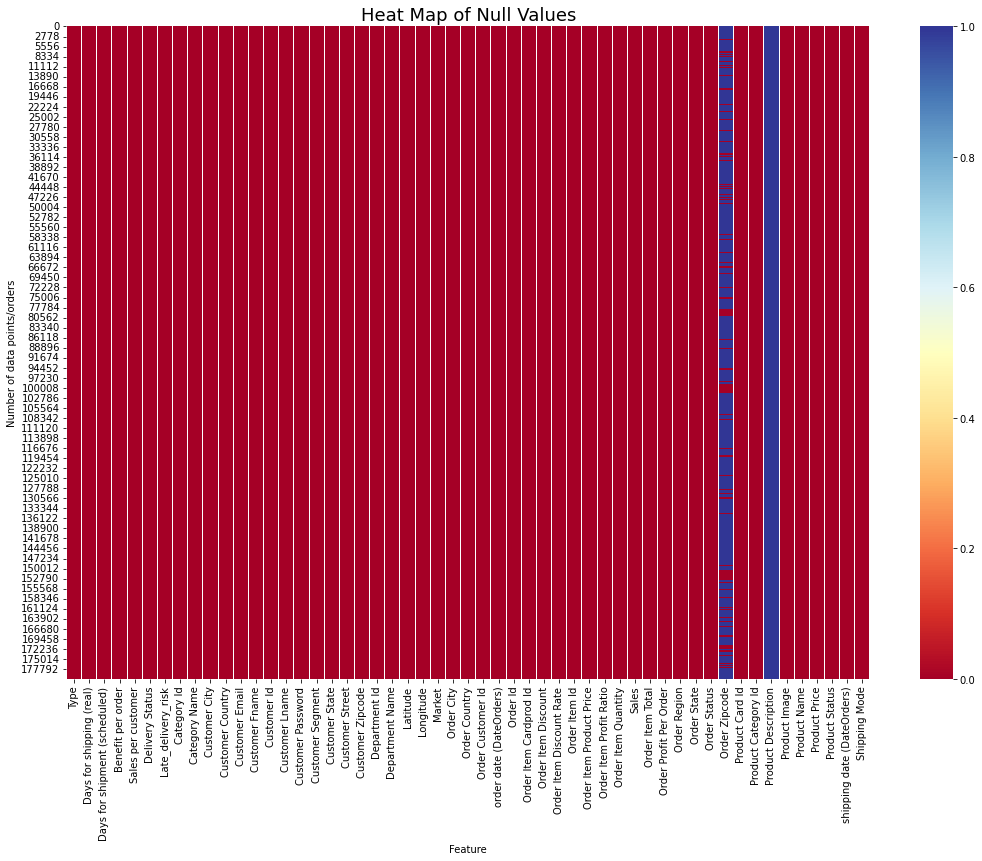

In [ ]:
plt.figure(figsize=(18,12))
plt.title("Heat Map of Null Values", fontdict={'fontsize': 18})
sns.heatmap(df.isnull(), cbar=True, cmap = "RdYlBu")
plt.xlabel("Feature")
plt.ylabel("Number of data points/orders")

We plot the correlation map to get the redundant columns. The redundant column have perfect correlation with another column. And following columns have correlation of 1 between each other:

1.   Order Profit Per Order and Benefit Per Order.
2.   Order Item Total and Sales per customer.
3.   Category Id and Product Category Id
4.   Order Customer Id and Customer Id
5.   Order Id and Order Item Id



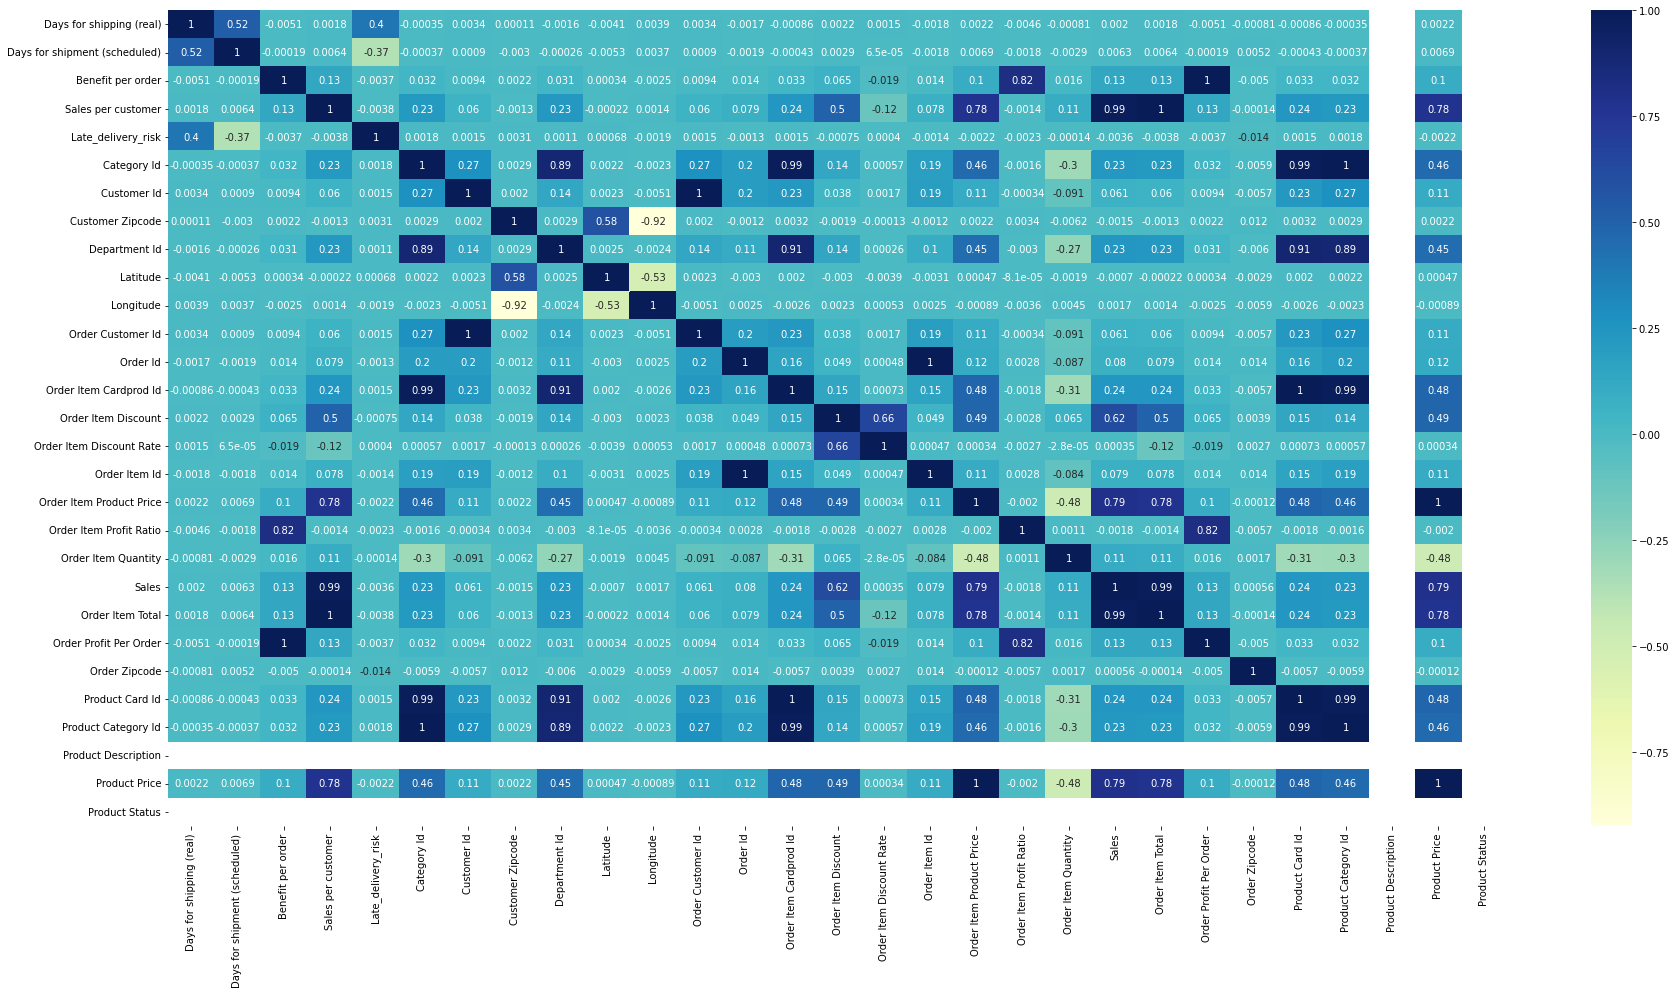

In [ ]:
plt.figure(figsize=(30,15))
correlation_map = df.corr()
map=sns.heatmap(df[correlation_map.index].corr(),annot=True,cmap="YlGnBu")

In [ ]:
# Cleaning the 'Customer Country' and Order Country columns

df['Customer Country'] = df['Customer Country'].apply(lambda x: x.replace('EE. UU.', 'USA') if x == 'EE. UU.' else x)
df['Order Country'] = df['Order Country'].apply(lambda x: x.replace('Estados Unidos', 'USA') if x == 'Estados Unidos' else x)

# Dropping the unwanted columns

df.drop(columns=['Category Id', 'Customer Email', 'Customer Fname', 'Customer Id', 'Customer Lname', 'Customer Password', 'Department Id', 'Order Id', 'Order Item Cardprod Id', 
                 'Order Item Id', 'Order Item Total', 'Order Profit Per Order', 'Product Card Id', 'Product Category Id', 'Product Description', 'Product Image'], inplace=True)

In [ ]:
# Looking at the shape of the final df after removing 16 columns and cleaning the 'Customer Country' column

df.shape

(180519, 37)

In [ ]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Segment', 'Customer State',
       'Customer Street', 'Customer Zipcode', 'Department Name', 'Latitude',
       'Longitude', 'Market', 'Order City', 'Order Country',
       'Order Customer Id', 'order date (DateOrders)', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Region', 'Order State', 'Order Status', 'Order Zipcode',
       'Product Name', 'Product Price', 'Product Status',
       'shipping date (DateOrders)', 'Shipping Mode'],
      dtype='object')

In [ ]:
df.head(1)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,...,Sales,Order Region,Order State,Order Status,Order Zipcode,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.25,314.640015,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,...,327.75,Southeast Asia,Java Occidental,COMPLETE,NaN,Smart watch,327.75,0,2/3/2018 22:56,Standard Class


# **3. Exploratory Data Analysis**

### **3.1 Simple frequency plots showing distribution of orders vs various features**

1.  A bar chart showing the Type of Transcations vs Number of Orders
2.  A bar chart showing the Delivery Status vs Number of Orders
3.  A bar chart showing the Product Category Name vs Number of Orders
4.  A bar chart showing the Order Status vs Number of Orders

Text(0.5, 1.0, 'Order Status vs Number of orders')

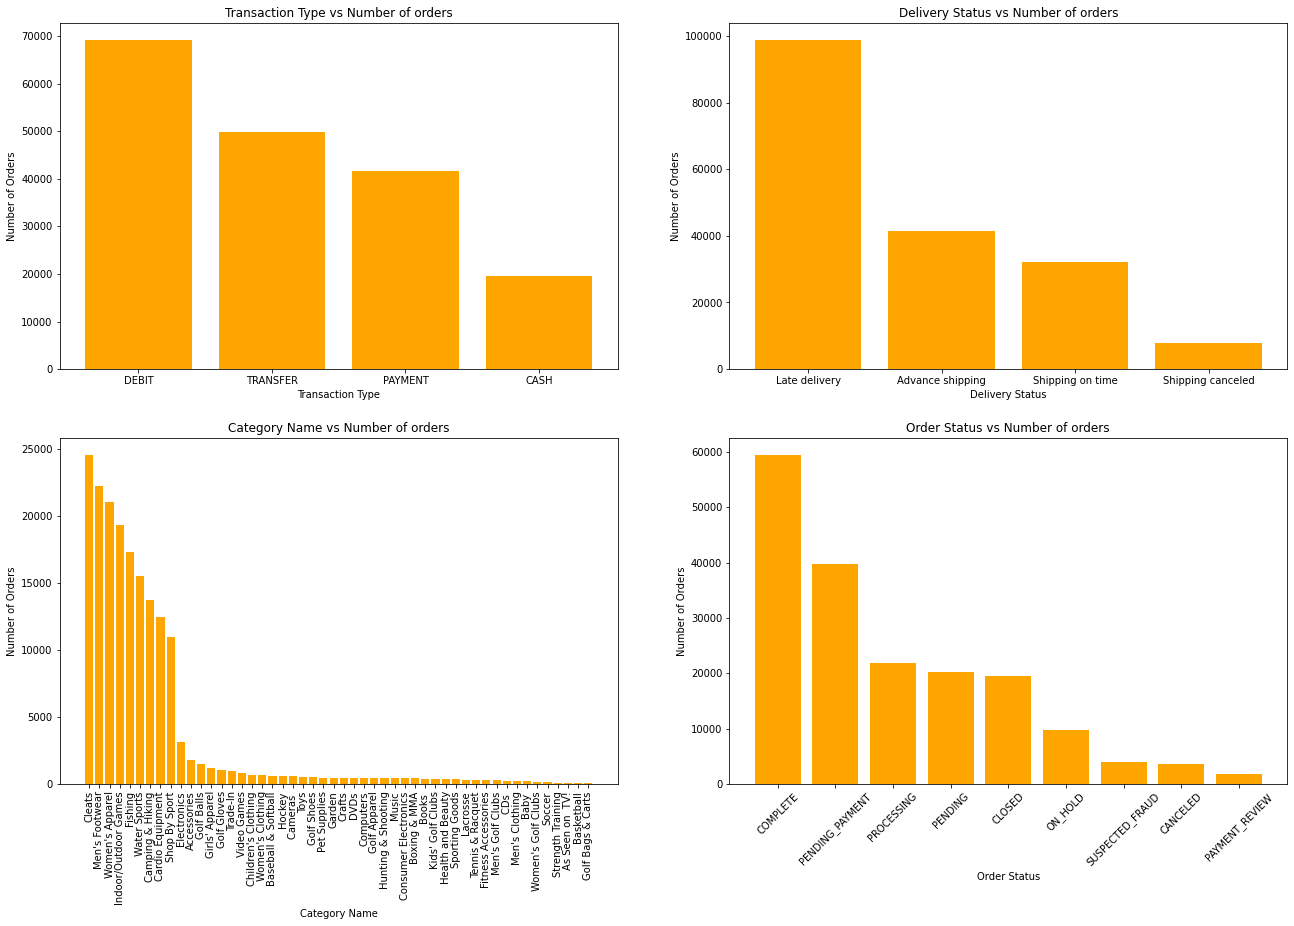

In [ ]:
# A bar chart showing the Type of Transcations vs Number of Orders

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(22,14))

ax[0,0].bar(list(df['Type'].value_counts().index), df['Type'].value_counts(), color = "orange")
ax[0,0].set_xlabel("Transaction Type")
ax[0,0].set_ylabel("Number of Orders")
ax[0,0].set_title("Transaction Type vs Number of orders")

# A bar chart showing the Delivery Status vs Number of Orders

ax[0,1].bar(list(df['Delivery Status'].value_counts().index), df['Delivery Status'].value_counts(), color = "orange")
ax[0,1].set_xlabel("Delivery Status")
ax[0,1].set_ylabel("Number of Orders")
ax[0,1].set_title("Delivery Status vs Number of orders")

# A bar chart showing the Category Name vs Number of Orders

ax[1,0].bar(list(df['Category Name'].value_counts().index), df['Category Name'].value_counts(), color = "orange")
ax[1,0].set_xticklabels(labels = list(df['Category Name'].value_counts().index),rotation=90)
ax[1,0].set_xlabel("Category Name")
ax[1,0].set_ylabel("Number of Orders")
ax[1,0].set_title("Category Name vs Number of orders")

# A bar chart showing the Order Status vs Number of Orders

ax[1,1].bar(list(df['Order Status'].value_counts().index), df['Order Status'].value_counts(), color = "orange")
ax[1,1].set_xticklabels(labels = list(df['Order Status'].value_counts().index),rotation=45)
ax[1,1].set_xlabel("Order Status")
ax[1,1].set_ylabel("Number of Orders")
ax[1,1].set_title("Order Status vs Number of orders")





###**Insights from 3.1**

1.  We can see that most of the orders placed were made using debit card transactions. 
2.  Majority of the deliveries are late deliveries, but complete. 
3.  The top 5 product categires bought were Cleats, Mens Footwear, Women's Apparel, Indoor/Outdoor Games and Fishing

### **3.2 EDA for Late Days - Delayed Deliveries**



### **3.2.1 Which product categories are getting delivered late the most?**

We first need to consider only late delivery data here and perform our analysis on that

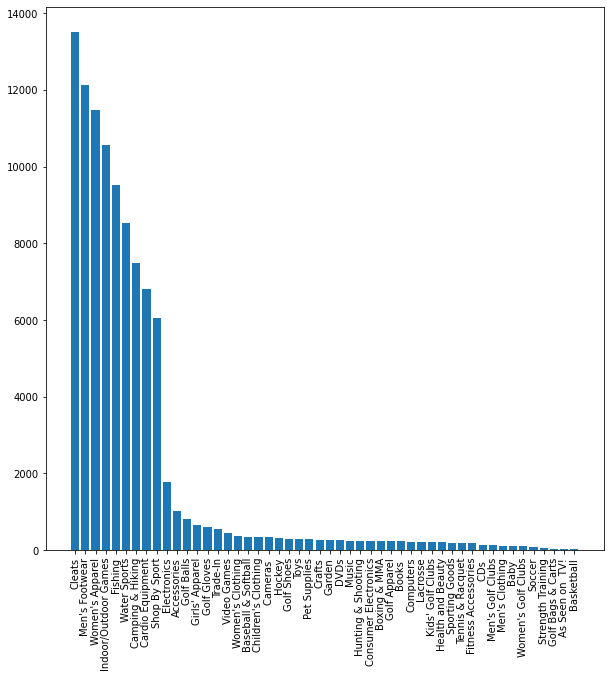

In [ ]:
from IPython.core.pylabtools import figsize
# Subsetting only late delivery data

late_df = df[df['Late_delivery_risk'] == 1]

# Plotting late deliveries for product categories

fig, ax = plt.subplots(figsize = (10,10))
ax.bar(list(late_df['Category Name'].value_counts().index), late_df['Category Name'].value_counts())
ax.set_xticklabels(labels = list(late_df['Category Name'].value_counts().index), rotation = 90)
plt.show()

### **3.2.2 Which destination countries are getting the most late deliveries?**

Now the orders are being placed from two countries which are USA and Puerto Rico. We will try to find which destination countries are receiving the products late the most from both USA and Puerto Rico.

*  Lets use pandasql for this



In [ ]:
late_df.head(1)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,...,Sales,Order Region,Order State,Order Status,Order Zipcode,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,...,327.75,South Asia,Rajastán,PENDING,NaN,Smart watch,327.75,0,1/18/2018 12:27,Standard Class


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Text(0, 0.5, 'Number of late deliveries')

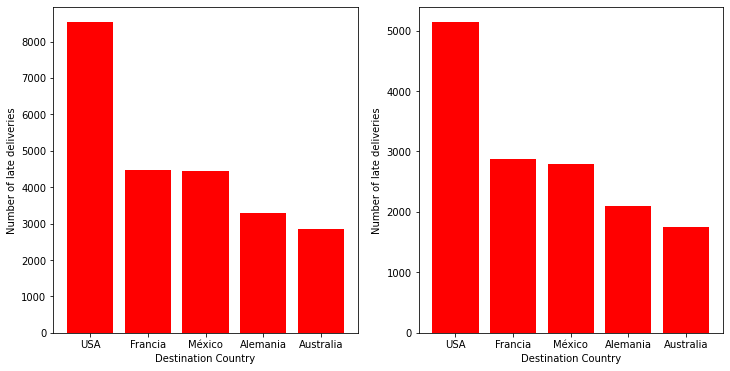

In [ ]:
# Subsetting data of late deliveries from USA to various countries round the world

late_df_usa = late_df[late_df['Customer Country'] == 'USA']
late_df_usa.rename(columns = {'Order Country':'Order_Country'}, inplace = True)

# Subsetting data of late deliveries from Puerto Rico to various countries round the world

late_df_puertorico = late_df[late_df['Customer Country'] == 'Puerto Rico']
late_df_puertorico.rename(columns = {'Order Country':'Order_Country'}, inplace = True)

query1 = """SELECT Order_Country, COUNT(*) AS Orders
            FROM late_df_usa
            GROUP BY Order_Country
            ORDER BY Orders DESC
            LIMIT 5"""

late_df_usa_final = ps.sqldf(query1)

query2 = """SELECT Order_Country, COUNT(*) AS Orders
            FROM late_df_puertorico
            GROUP BY Order_Country
            ORDER BY Orders DESC
            LIMIT 5"""

late_df_puertorico_final = ps.sqldf(query2)

# Plotting late days

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (12,6))

ax[0].bar(late_df_usa_final['Order_Country'], late_df_usa_final['Orders'], color = "red") 
ax[1].bar(late_df_puertorico_final['Order_Country'], late_df_puertorico_final['Orders'], color = "red") 
ax[0].set_xlabel("Destination Country")
ax[0].set_ylabel("Number of late deliveries")
ax[1].set_xlabel("Destination Country")
ax[1].set_ylabel("Number of late deliveries")


### **Insights From 3.2.2**

When orders are placed from both USA and Puerto Rico, the destination countries excluding USA which receive delayed deliveries are France, Mexico, Alemenia and Australia

### **3.2.3**

Delivery statistics by shipping mode

Lets understand how the delivery time varied according to the Shipping Mode selected by the customers.

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


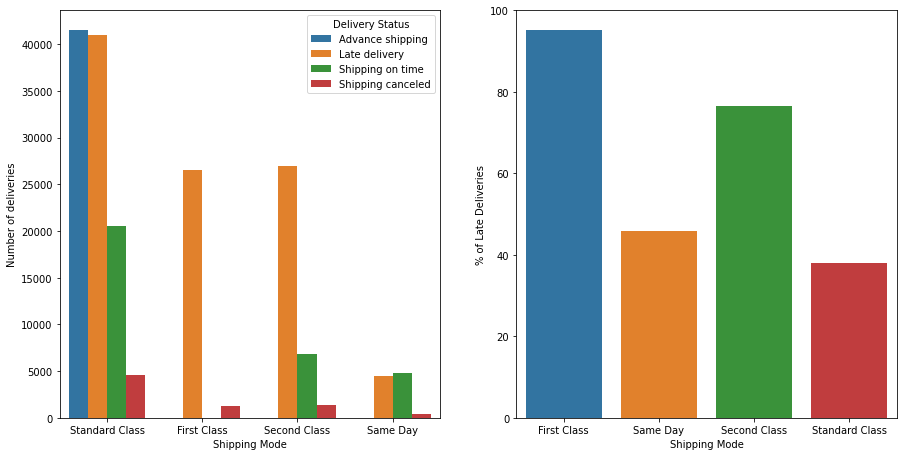

In [ ]:
# Plot showing deliveries made based on shipping mode

df.rename(columns = {'Shipping Mode':'Shipping_Mode'}, inplace = True)
late_df.rename(columns = {'Shipping Mode':'Shipping_Mode'}, inplace = True)

query1 = """SELECT Shipping_Mode, COUNT(*) as Total_Deliveries
            FROM df
            GROUP BY Shipping_Mode"""

total_deliveries_sm = ps.sqldf(query1)

query2 = """SELECT Shipping_Mode, COUNT(*) as Late_Deliveries
            FROM late_df
            GROUP BY Shipping_Mode"""

late_deliveries_sm = ps.sqldf(query2)

query3 = """SELECT total_deliveries_sm.Shipping_Mode, total_deliveries_sm.Total_Deliveries, late_deliveries_sm.Late_Deliveries
            FROM total_deliveries_sm
            JOIN late_deliveries_sm
            ON total_deliveries_sm.Shipping_Mode = late_deliveries_sm.Shipping_Mode"""

final_sm = ps.sqldf(query3)
final_sm['LD_%'] = final_sm['Late_Deliveries']/final_sm['Total_Deliveries']*100


fig, ax = plt.subplots(1, 2, figsize = (15,7.5))

sns.countplot(x = df['Shipping_Mode'], hue = df['Delivery Status'], data = df, ax=ax[0])
sns.barplot(final_sm['Shipping_Mode'], final_sm['LD_%'], ax=ax[1])
ax[0].set_xlabel("Shipping Mode")
ax[0].set_ylabel("Number of deliveries")
ax[1].set_xlabel("Shipping Mode")
ax[1].set_ylabel("% of Late Deliveries")
plt.show()


### **Insights from 3.2.3**

1.   Standard Class Shipping Mode has the lowest % of late deliveries of about ~40%, and First Class Shipping Mode had the highest % of late deliveries of about ~95%.
2.   First Class Shipping Mode has no deliveries that were shipped in advance or shipped on time. All the deliveries were either late or cancelled.
3.  For Same Day Delivery Shipping Mode, there were more number of deliveries that were shipped on time than those that were shipped late. For Same Day Delivery, the supply chain tried harder to deliver on time.



### **3.3 Temporal Analysis**

It is very important especially in supply chain to understand how the orders are being place based on time.
*  There is a date column in our dataset called order date (DateOrders) which tells us the date on which the order was placed.
*  Let us plot the frequency of orders placed every year, every month, every hour of day and every day of week.

In [ ]:
# Let us convert the column 'order date (DateOrders)' to a datetime object, a new column called 'date' to make it useful for analysis

df['date'] = df['order date (DateOrders)'].apply(lambda x: dt.datetime.strptime(x, "%m/%d/%Y %H:%M"))

In [ ]:
# Let us now extract day, month, year, hour and day name from the date created above

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['weekday'] = df['date'].dt.day_name()

<BarContainer object of 7 artists>

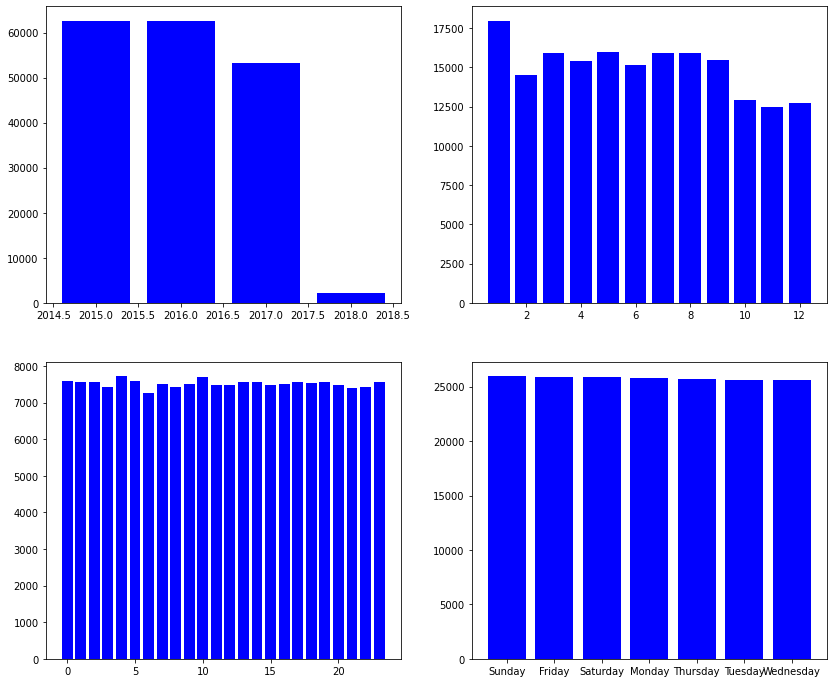

In [ ]:
# Let us plot the distribution of orders placed by Year, Month, Hour and Day Name

fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (14,12))

ax[0, 0].bar(list(df['year'].value_counts().index), df['year'].value_counts(), color = "blue")

ax[0, 1].bar(list(df['month'].value_counts().index), df['month'].value_counts(), color = "blue") 

ax[1, 0].bar(list(df['hour'].value_counts().index), df['hour'].value_counts(), color = "blue") 

ax[1, 1].bar(list(df['weekday'].value_counts().index), df['weekday'].value_counts(), color = "blue") 

### **3.4 Geographical Analysis**

The following map displays destination countries that have given the company most profit. 

In [ ]:
geo_map = df.groupby(['Order Country'])['Benefit per order'].sum().reset_index(name='Total_Profit')
geo_map = geo_map.sort_values(by= 'Total_Profit', ascending= False)
geo_map.head()

,Order Country,Total_Profit
153,USA,540413.070422
52,Francia,327828.580099
101,México,303278.370637
2,Alemania,194827.080381
20,Brasil,186713.640355


In [ ]:
import plotly.express as px

fig = px.choropleth(geo_map ,  locationmode='country names', locations='Order Country',
                    color='Total_Profit', 
                    hover_name='Order Country')

fig.show()

# **4. Building Classifiers**

Let us build a classifier to predict the late delivery risk, given some of the chosen features as inputs for the model.

First let us build a **Naive Bayes** model to predict the late delivery risk.

Let us the choose the columns that we will use to build our model here.

**Predictor Columns:**

1.   Type
2.   Days For Shipment (Scheduled)
3.   Sales Per Customer (processed below)
4.   Market
5.   Order Item Quantity
6.   Order Status
7.   Shipping Mode

**Prediction Column**

1.   Late Delivery Risk



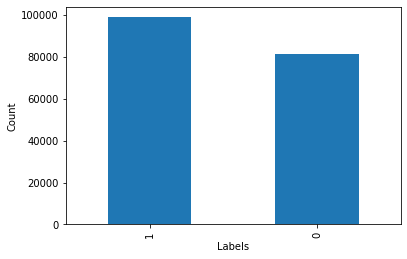

In [ ]:
#We will look at the our label Late Delivery Risk using histogram
#sns.histplot(df["Late_delivery_risk"], fill=True) 
plt.xlabel("Labels")
plt.ylabel("Count")
df["Late_delivery_risk"].value_counts().plot(kind = 'bar')

We can see that the target variable is fairly balanced. 1 - Late Delivery, 0 - Delivery on time.

(array([1.19895e+05, 5.43070e+04, 5.84600e+03, 4.00000e+00, 8.00000e+00,
        2.70000e+01, 1.98000e+02, 2.20000e+02, 6.00000e+00, 8.00000e+00]),
 array([   7.48999977,  200.73999879,  393.98999782,  587.23999684,
         780.48999586,  973.73999489, 1166.98999391, 1360.23999293,
        1553.48999195, 1746.73999098, 1939.98999   ]),
 <a list of 10 Patch objects>)

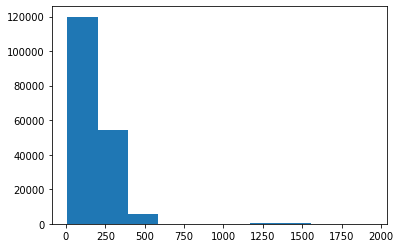

In [ ]:
# Let us look at the distribution of the 'Sales per customer' column using a histogram

fig, ax = plt.subplots()
ax.hist(df['Sales per customer'], bins = 10)

In [ ]:
df['Sales per customer'].describe()

count    180519.000000
mean        183.107609
std         120.043670
min           7.490000
25%         104.379997
50%         163.990005
75%         247.399994
max        1939.989990
Name: Sales per customer, dtype: float64

From the histogram let us divide the values in the 'Sales per customer' column into three groups

1.  7.4 dollars - 201 dollars as (Less than 201 dollars)
2.  201 - 394 as (201 dollars - 394 dollars)
3.   More than 394 dollars as (Greater than 394 dollars)

In [ ]:
# Create a function to convert each value in the 'Sales per customer' column to the corresponding group

def group(x):
  if int(x)<= 201:
    return 'Less than $201'
  elif int(x) >201 and int(x) <=394:
    return '$201 - $394'
  else:
    return 'Greater than $394'

# Convert each value in the 'Sales per customer' column to the corresponding group

df['Sales_per_customer_refined'] = df['Sales per customer'].apply(lambda x: group(x))

Let us now create a subset of the main dataframe df to create a new dataframe df_model which we will use for our modelling purposes.

Let us subset the columns mentioned above which we will use for this modelling.

In [ ]:
df_model = df[['Type', 'Days for shipment (scheduled)', 'Sales_per_customer_refined', 'Market', 'Order Item Quantity', 'Order Status', 'Shipping_Mode', 'Late_delivery_risk']]

Let us look at the dataset that we will be usning for our modeling

In [ ]:
df_model.tail()

,Type,Days for shipment (scheduled),Sales_per_customer_refined,Market,Order Item Quantity,Order Status,Shipping_Mode,Late_delivery_risk
180514,CASH,4,Greater than $394,Pacific Asia,1,CLOSED,Standard Class,0
180515,DEBIT,2,Greater than $394,Pacific Asia,1,COMPLETE,Second Class,1
180516,TRANSFER,4,$201 - $394,Pacific Asia,1,PENDING,Standard Class,1
180517,PAYMENT,4,$201 - $394,Pacific Asia,1,PENDING_PAYMENT,Standard Class,0
180518,PAYMENT,4,$201 - $394,Pacific Asia,1,PENDING_PAYMENT,Standard Class,0


**Ordinal Encoding** of the 'Sales_per_customer_refined' column.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder(categories=[['Less than $201', '$201 - $394', 'Greater than $394']])
df_model['Sales_per_customer_refined'] = ord_enc.fit_transform(df_model[['Sales_per_customer_refined']])
# ordinal_encoded_df = pd.DataFrame(b)
# ordinal_encoded_df
df_model['Sales_per_customer_refined']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
180514    2.0
180515    2.0
180516    1.0
180517    1.0
180518    1.0
Name: Sales_per_customer_refined, Length: 180519, dtype: float64

**OneHotEncoding of the other columns**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
a = enc.fit_transform(df_model[['Type', 'Days for shipment (scheduled)', 'Market', 'Order Item Quantity', 'Order Status', 'Shipping_Mode']]).toarray()
encoded_df = pd.DataFrame(a)
encoded_df

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
180515,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
180516,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
180517,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


Combining both the ordinal encoded and onehotencoded dataframes to form the final_model_data dataframe which we will use for our analysis.

In [ ]:
final_model_data = pd.concat([encoded_df, df_model[['Sales_per_customer_refined']]], axis=1, join='inner')
final = pd.concat([final_model_data, df_model[['Late_delivery_risk']]], axis=1, join='inner')
final

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,Sales_per_customer_refined,Late_delivery_risk
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0
180515,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1
180516,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
180517,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0


Lets now split our dataset into train and test splits

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(final.drop(columns = 'Late_delivery_risk'), final['Late_delivery_risk'], test_size = 0.3, random_state = 42)

Now, we train and fit two models.

1.   Categorical Naive Bayes
2.   Gaussian Naive Bayes



In [ ]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB

# Declaring both the models
cnb = CategoricalNB()
gnb = GaussianNB()

# Fitting both the models on the training dataset
cnb.fit(X_train, y_train)
gnb.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



GaussianNB()

In [ ]:
# Predicting on X_test

pred_cnb = cnb.predict(X_test)
pred_gnb = gnb.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



In [ ]:
pred_cnb

array([0, 1, 0, ..., 1, 0, 0])

In [ ]:
pred_gnb

array([1, 1, 1, ..., 1, 1, 1])

Let us now find out the **Accuracies** of our models

In [ ]:
from sklearn.metrics import accuracy_score

cnb_accuracy = accuracy_score(y_test, pred_cnb)
cnb_accuracy

0.7067545608981461

In [ ]:
gnb_accuracy = accuracy_score(y_test, pred_gnb)
gnb_accuracy

0.5921966171799985

We can see that the categorical Naive Bayes is more accurate with 70% accuracy.

**This is because our data which we used for this modeling is a categorical dataset. So Categorical Naive Bayes should give higher accuracy, which is what we obtained**

Let us find out the **Recall, Precision and F1 scores** of the Categorical Naive Bayes model

In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

recall = recall_score(y_test, pred_cnb)
precision = precision_score(y_test, pred_cnb)
f1_score = f1_score(y_test, pred_cnb)

print('the recall score is {}'.format(recall))
print('the precision score is {}'.format(precision))
print('the f1 score score is {}'.format(f1_score))


the recall score is 0.5829551185073122
the precision score is 0.8330130668716372
the f1 score score is 0.6859041553766737


**High Precision score here tells that the False Positives are less, meaning that the model is not predicting orders as Late deliveries if they are actually not late deliveries. This is a very good thing especially in the supply chain space. We dont want to predict orders that are on time as late deliveries, which is exactly what our model is doing**

Let us also print the **Classification Report** for the Categorical Naive Bayes Model.

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_cnb))

              precision    recall  f1-score   support

           0       0.63      0.86      0.73     24411
           1       0.83      0.58      0.69     29745

    accuracy                           0.71     54156
   macro avg       0.73      0.72      0.71     54156
weighted avg       0.74      0.71      0.70     54156



Let us also plot the **Confusion Matrix** for the Categorical Naive Bayes Model

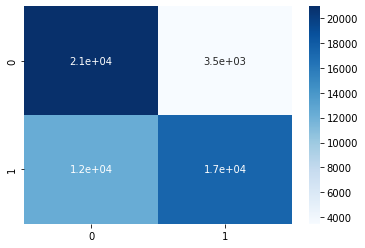

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matr = confusion_matrix(y_test, pred_cnb)
fig, ax = plt.subplots()
ax = sns.heatmap(conf_matr, annot=True, cmap="Blues")

**Now let's try some sophisticated models like a Random Forest. The list of models that we are going to try next:**

1.   Logistic Regression
2.   Random Forest

We will use Logistic Regression as a baseline classifier.

Lets look at our cleaned dataset.

In [ ]:
print(df.shape)
df.head(3)

(180519, 44)


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,...,Product Status,shipping date (DateOrders),Shipping_Mode,date,year,month,day,hour,weekday,Sales_per_customer_refined
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,...,0,2/3/2018 22:56,Standard Class,2018-01-31 22:56:00,2018,1,31,22,Wednesday,$201 - $394
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,...,0,1/18/2018 12:27,Standard Class,2018-01-13 12:27:00,2018,1,13,12,Saturday,$201 - $394
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,Sporting Goods,San Jose,USA,...,0,1/17/2018 12:06,Standard Class,2018-01-13 12:06:00,2018,1,13,12,Saturday,$201 - $394


We will extract numeric and categorical columns and select the one's that we require for training.

In [ ]:
numeric_df = df.select_dtypes(include=[np.number])
categorical_df = df.select_dtypes(exclude=[np.number])
numeric_df.head(2)

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Customer Zipcode,Latitude,Longitude,Order Customer Id,Order Item Discount,...,Order Item Profit Ratio,Order Item Quantity,Sales,Order Zipcode,Product Price,Product Status,year,month,day,hour
0,3,4,91.250000,314.640015,0,725.0,18.251453,-66.037056,20755,13.110000,...,0.29,1,327.75,NaN,327.75,0,2018,1,31,22
1,5,4,-249.089996,311.359985,1,725.0,18.279451,-66.037064,19492,16.389999,...,-0.80,1,327.75,NaN,327.75,0,2018,1,13,12


In [ ]:
categorical_df.head(2)

,Type,Delivery Status,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Customer Street,Department Name,Market,...,order date (DateOrders),Order Region,Order State,Order Status,Product Name,shipping date (DateOrders),Shipping_Mode,date,weekday,Sales_per_customer_refined
0,DEBIT,Advance shipping,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,5365 Noble Nectar Island,Fitness,Pacific Asia,...,1/31/2018 22:56,Southeast Asia,Java Occidental,COMPLETE,Smart watch,2/3/2018 22:56,Standard Class,2018-01-31 22:56:00,Wednesday,$201 - $394
1,TRANSFER,Late delivery,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,2679 Rustic Loop,Fitness,Pacific Asia,...,1/13/2018 12:27,South Asia,Rajastán,PENDING,Smart watch,1/18/2018 12:27,Standard Class,2018-01-13 12:27:00,Saturday,$201 - $394


After glancing over all the numeric and categorical features we remove the features that are irrelevant or are almost perfectly correlated to the other features and thus we boil down to following features for our classification model:
 

1.   Market
2.   Order Country
3.   Customer Segment
4.   Type
5.   Shipping_Mode
6.   Benefit per order (Basically Profit Per Order)
7.   Latitude
8.   Longitude
9.   Days for shipment (scheduled)
10.  Order Status
11.  Order Item Quantity



In [ ]:
cat_columns = ['Order Country', 'Customer Segment', 'Type','Shipping_Mode','Market','Order Status']
num_columns = ['Benefit per order','Latitude','Longitude','Days for shipment (scheduled)','Order Item Quantity']
df_cat = df[cat_columns]
df_num = df[num_columns]
target_col = df[['Late_delivery_risk']]

In [ ]:
df_cat.head(1)

,Order Country,Customer Segment,Type,Shipping_Mode,Market,Order Status
0,Indonesia,Consumer,DEBIT,Standard Class,Pacific Asia,COMPLETE


In [ ]:
df_num.head(1)

,Benefit per order,Latitude,Longitude,Days for shipment (scheduled),Order Item Quantity
0,91.25,18.251453,-66.037056,4,1


We will use a Label encoder for categorical variable, due to purposes of using feature selection using Random Forest. Though, a one hot encoder will perform equivalently well on this dataset.

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
def LE_features(sdf):
    sdf=LE.fit_transform(sdf)
    return sdf

In [ ]:
df_cat = df_cat.apply(LE_features)
# df_cat = pd.get_dummies(df_cat)
# df_cat.head(1)

In [ ]:
training_dataset = pd.concat([df_num,df_cat, target_col], axis=1, join='inner') 
training_dataset.head(1)

,Benefit per order,Latitude,Longitude,Days for shipment (scheduled),Order Item Quantity,Order Country,Customer Segment,Type,Shipping_Mode,Market,Order Status,Late_delivery_risk
0,91.25,18.251453,-66.037056,4,1,69,0,1,3,3,2,0


We shuffle our dataset.

In [ ]:
#Shuffle our dataset
training_dataset = training_dataset.sample(frac=1)
training_dataset.head(1)

,Benefit per order,Latitude,Longitude,Days for shipment (scheduled),Order Item Quantity,Order Country,Customer Segment,Type,Shipping_Mode,Market,Order Status,Late_delivery_risk
29549,178.589996,41.231693,-81.848015,2,1,38,1,2,2,2,6,1


In [ ]:
training_dataset_final = training_dataset
train_X, test_X, train_y, test_y = train_test_split(training_dataset_final.drop(columns = 'Late_delivery_risk'), training_dataset_final['Late_delivery_risk'], test_size = 0.2, random_state = 42)

**Logistic Regression**

In [ ]:
#Accuracy Score of Test data
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(train_X, train_y)
clf.score(test_X, test_y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0.6508420119654332

In [ ]:
pred_lr = clf.predict(test_X) 
recall = recall_score(test_y, pred_lr)
precision = precision_score(test_y, pred_lr)

print('the recall score is {}'.format(recall))
print('the precision score is {}'.format(precision))
print(classification_report(test_y, pred_lr))

the recall score is 0.6241485443261516
the precision score is 0.7057682432817938
              precision    recall  f1-score   support

           0       0.60      0.68      0.64     16285
           1       0.71      0.62      0.66     19819

    accuracy                           0.65     36104
   macro avg       0.65      0.65      0.65     36104
weighted avg       0.66      0.65      0.65     36104



**Random Forest**

In [ ]:
#Accuracy Score of Test Data
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(train_X, train_y)
rf.score(test_X,test_y)

0.8390206071349435

In [ ]:
pred_rf = rf.predict(test_X) 
recall = recall_score(test_y, pred_rf)
precision = precision_score(test_y, pred_rf)

print('the recall score is {}'.format(recall))
print('the precision score is {}'.format(precision))
print(classification_report(test_y, pred_rf))

the recall score is 0.8060447045764165
the precision score is 0.8903193445912054
              precision    recall  f1-score   support

           0       0.79      0.88      0.83     16285
           1       0.89      0.81      0.85     19819

    accuracy                           0.84     36104
   macro avg       0.84      0.84      0.84     36104
weighted avg       0.84      0.84      0.84     36104



In [ ]:
feature_scores = pd.Series(rf.feature_importances_, index=train_X.columns).sort_values(ascending=False)
feature_scores

Latitude                         0.190740
Longitude                        0.171017
Benefit per order                0.157764
Days for shipment (scheduled)    0.112438
Shipping_Mode                    0.100135
Order Country                    0.090587
Order Status                     0.078305
Order Item Quantity              0.031852
Market                           0.028684
Customer Segment                 0.024372
Type                             0.014106
dtype: float64

Feature Scores Visualization using Random Forest. Latitude and Longitude are the best features to predict late delivery.

Text(0.5, 0, 'Feature Importance using Random Forest')

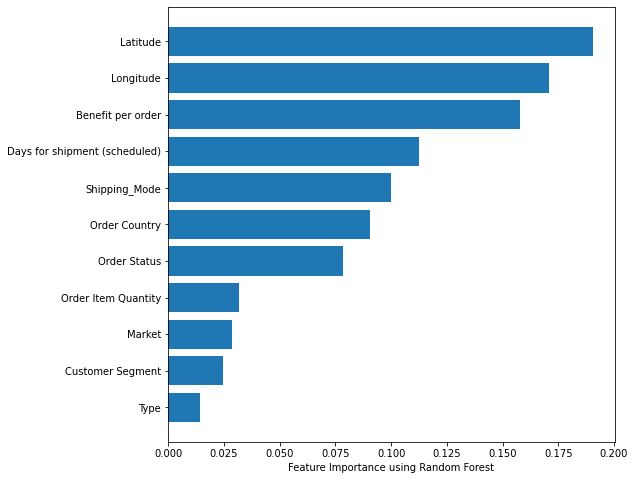

In [ ]:
sorted = rf.feature_importances_.argsort()
plt.figure(figsize=(8,8))
plt.barh(training_dataset.columns[sorted], rf.feature_importances_[sorted])
plt.xlabel("Feature Importance using Random Forest")

Now referring the above graph, we will again perform feature selection for our model. In this case we will remove the features with feature importance score of less than 5%. Therefore we will remove features "Customer Segment","Type","Order Item Quantity","Market" and train our model.

In [ ]:
#Accuracy score of test data
rf2 = RandomForestClassifier()
rf2.fit(train_X.drop(columns = ["Customer Segment","Type","Order Item Quantity","Market"]), train_y)
rf2.score(test_X.drop(columns = ["Customer Segment","Type","Order Item Quantity","Market"]),test_y)

0.8558608464436074

In [ ]:
pred_rf2 = rf2.predict(test_X.drop(columns = ["Customer Segment","Type","Order Item Quantity","Market"])) 
recall = recall_score(test_y, pred_rf2)
precision = precision_score(test_y, pred_rf2)

print('the recall score is {}'.format(recall))
print('the precision score is {}'.format(precision))
print(classification_report(test_y, pred_rf2))

the recall score is 0.8326858065492709
the precision score is 0.8973410907509107
              precision    recall  f1-score   support

           0       0.81      0.88      0.85     16285
           1       0.90      0.83      0.86     19819

    accuracy                           0.86     36104
   macro avg       0.86      0.86      0.86     36104
weighted avg       0.86      0.86      0.86     36104



# Conclusion

We tried multiple models from Gaussian Naive Bayes to Random Forest. Some insights we obtained are as follows:

1.   Categorical Naive Bayes outperformed Gaussian Naive Bayes as there is lot of categorical data in our dataset.
2.   Random Forest classifier performed the best among all classifier with F1 score of 0.85. Thus showing us that bagging works great on this dataset.
3.   We could discard some of the features by visualizing feature importance thus improving our model and reducing computation.



# Challenges



1.   Since there are too many rows and features,especially when we one hot encode the categorical columns; hyperparameter tuning of the model becomes time consuming.
2.   On analysis we found that the dataset is perfectly balanced on many features thus it becomes a challenging task to derive interesting insights via visualization. 
3.   Choosing right set of features is a tricky task. For our case we selected final features based on feature importance scores but there other techniques like SHAP feature selection that can be used but due to time constraints we didn't delve in that direction.



# Future Work
Some interesting ideas that we can work on in future:

1.   Analyzing and predicting the "suspected fraud" label in the order status column can help the company plan better.
2.   Customer Segmentation and Audience Analysis using additional datasets like census data.
3.   Some more visualizations like top routes can be plotted using a georgraphical map.



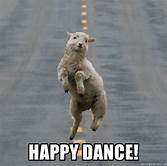